In [4]:
from sklearn.datasets import load_iris
import numpy as np
irisData = load_iris()
X, y = irisData["data"], irisData["target"]

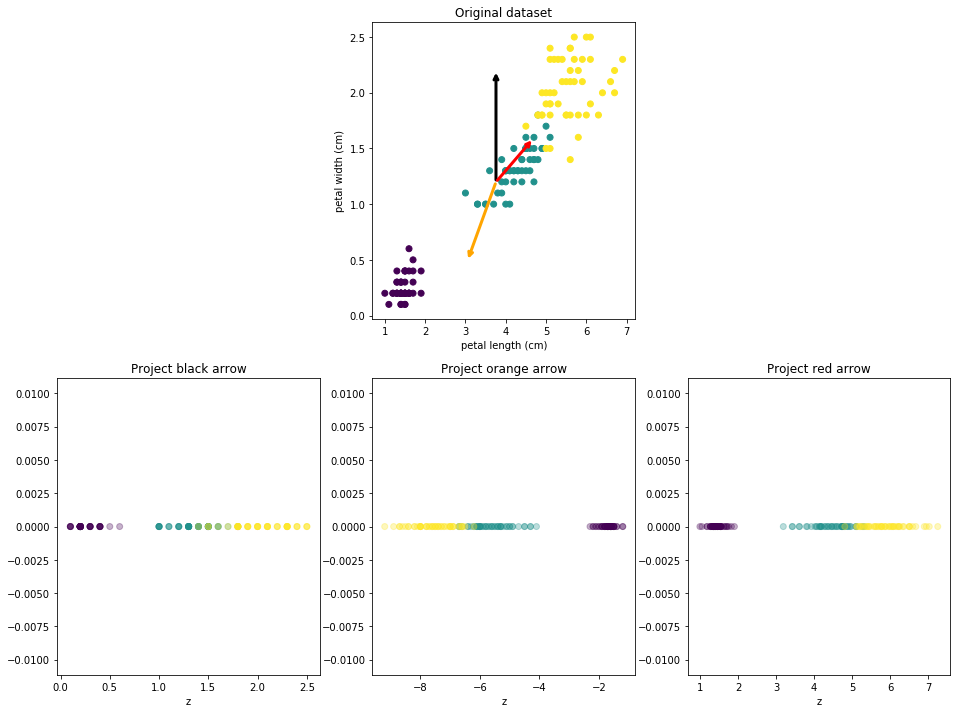

In [88]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def project(X,axisOrth):
    return np.dot(X, axisOrth.T)
pca = PCA(n_components=1)
pca.fit(X[:, 2:])
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,3,2)
plt.scatter(X[:, 2],X[:, 3],c=y)
axis1 = np.array([0,1])
axis2 = np.array([-1, -1])
axis3 = pca.components_[0]
plt.annotate('',pca.mean_,pca.mean_+axis1/np.sqrt(np.dot(axis1,axis1)),
             arrowprops=dict(arrowstyle='<-',linewidth=3,color='black'))
plt.annotate('',pca.mean_,pca.mean_+axis2/np.sqrt(np.dot(axis2,axis2)),
             arrowprops=dict(arrowstyle='<-',linewidth=3,color='orange'))
plt.annotate('',pca.mean_,pca.mean_+axis3/np.sqrt(np.dot(axis3,axis3)),
             arrowprops=dict(arrowstyle='<-',linewidth=3,color='red'))

plt.title('Original dataset')
plt.xlabel(irisData['feature_names'][2])
plt.ylabel(irisData['feature_names'][3])
ax = fig.add_subplot(2,3,4)
zaxis1 = axis1[0]*X[:, 2] + axis1[1]*X[:, 3]
plt.scatter(project(X[:,2:],axis1),np.zeros(len(zaxis1)),c=y,alpha=.3)
plt.title('Project black arrow')
plt.xlabel('z')
ax = fig.add_subplot(2,3,5)
zaxis2 = axis2[0]*X[:, 2] + axis2[1]*X[:, 3]
plt.scatter(project(X[:,2:],axis2),np.zeros(len(zaxis1)),c=y,alpha=.3)
plt.title('Project orange arrow')
plt.xlabel('z')
ax = fig.add_subplot(2,3,6)
zaxis3 = axis3[0]*X[:, 2] + axis3[1]*X[:, 3]
plt.scatter(project(X[:,2:],axis3),np.zeros(len(zaxis1)),c=y,alpha=.3)
plt.title('Project red arrow')
plt.xlabel('z')
plt.savefig('projectionAcrossDifferentAxes.png',bbox_inches='tight')
plt.show()

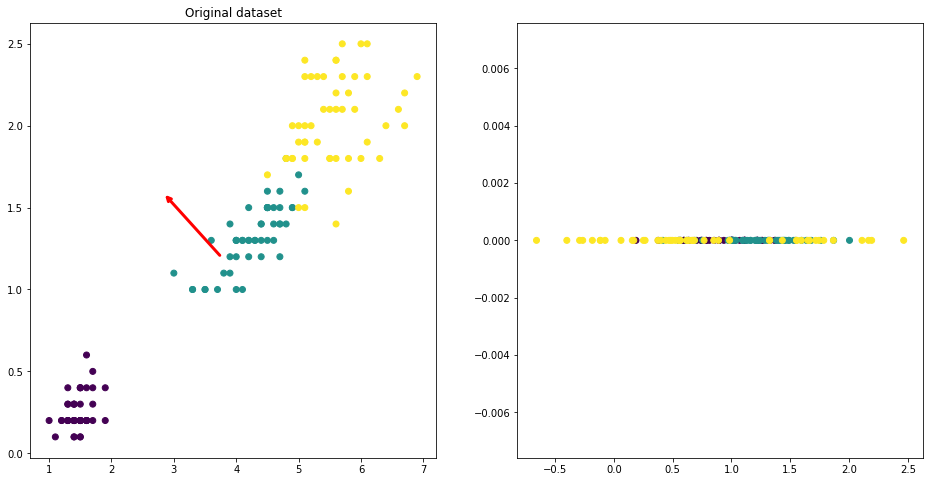

In [120]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def project(X,axisOrth):
    return np.dot(X, axisOrth.T)

pca = PCA(n_components=1)
pca.fit(X[:, 2:])
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1)
plt.scatter(X[:, 2],X[:, 3],c=y)
axis3 = pca.components_[0]
axisOrth = np.random.randn(2)
axisOrth -= axisOrth.dot(axis3) * axis3 / np.linalg.norm(axis3)**2
axisOrth = 1/axisOrth # this is wrong but the visualization looks weird somehow without
                      # it, even if the dot-product before inverse is 0
axisOrth = axisOrth/np.sqrt(np.dot(axisOrth,axisOrth))
plt.annotate('',pca.mean_,pca.mean_-axisOrth,
             arrowprops=dict(arrowstyle='<-',linewidth=3,color='red'))
plt.title('Original dataset')
ax = fig.add_subplot(122)
plt.scatter(project(X[:,2:],1/axisOrth),np.zeros(len(X[:,0])),c=y)#z,np.zeros(len(n)),c=y)
# plt.savefig('projectionMinimalVariance.png',bbox_inches='tight')
plt.show()

Text(0.5, 1.0, '2.1649348980190553e-15')

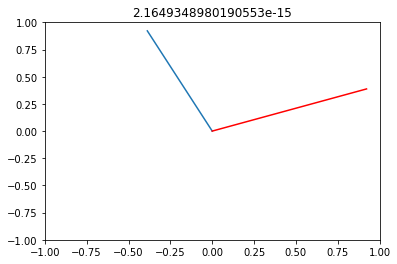

In [117]:
axis3 = pca.components_[0]
axisO = np.random.randn(2)
axisO -= axisO.dot(axis3) * axis3 / np.linalg.norm(axis3)**2
axisO = axisO/np.sqrt(np.dot(axisO,axisO))
plt.plot([0,-axis3[1]],[0,axis3[0]])
plt.plot([0,axis3[0]],[0,axis3[1]],color='red')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title((axisO).dot(axis3))

In [111]:
axis3,axisO

(array([0.92177769, 0.38771882]), array([-0.38771882,  0.92177769]))

In [60]:
axis3.dot(axisOrth)

-1.734723475976807e-17

In [50]:
axis3

array([0., 0.])

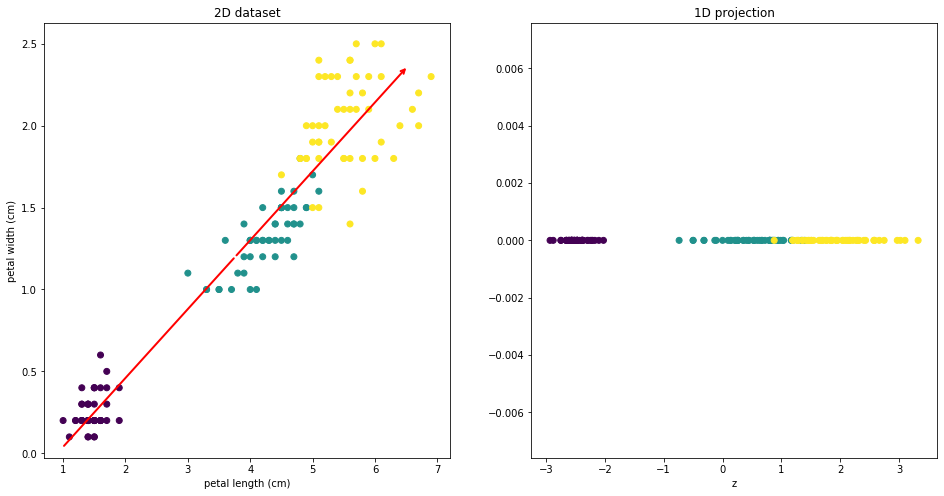

In [80]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
plt.scatter(X[:, 2],X[:, 3],c=y)
plt.annotate('',pca.mean_,pca.mean_-3*pca.components_[0],arrowprops=dict(arrowstyle='-',linewidth=2,color='red'))
plt.annotate('',pca.mean_,pca.mean_+3*pca.components_[0],arrowprops=dict(arrowstyle='<-',linewidth=2,color='red'))
plt.title('2D dataset')
plt.xlabel(irisData['feature_names'][2])
plt.ylabel(irisData['feature_names'][3])
ax = fig.add_subplot(122)
# z = pca.components_[0,0]*X[:, 2] + pca.components_[0,1]*X[:, 3]
plt.scatter(pca.transform(X[:, 2:]),np.zeros(len(n)),c=y)#z,np.zeros(len(n)),c=y)
plt.title('1D projection')
plt.xlabel('z')
# plt.savefig('projection2D1D.png',bbox_inches='tight')
plt.show()

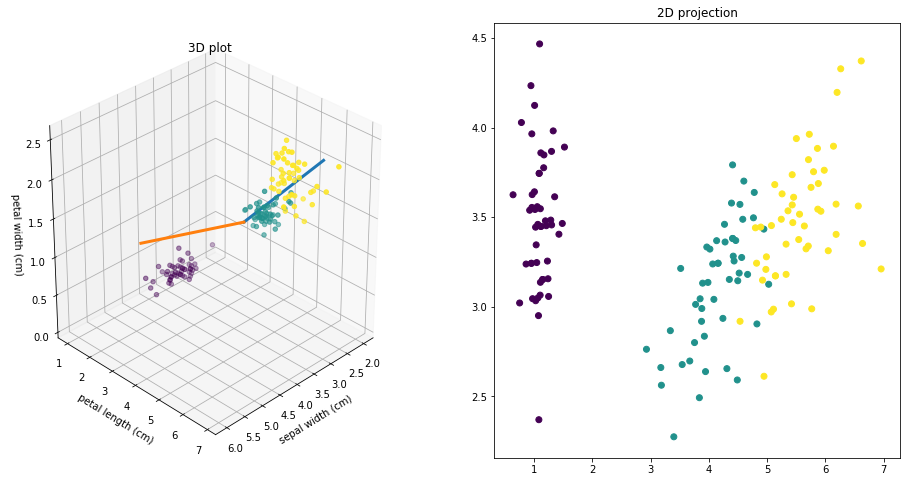

In [88]:
from mpl_toolkits.mplot3d import Axes3D
pca2 = PCA(n_components=2)
pca2.fit(X[:, 1:])
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 1],X[:, 2],X[:, 3],c=y)
comp1 = pca2.mean_+3*pca2.components_[0]
comp2 = pca2.mean_+3*pca2.components_[1]
ax.plot(xs=[pca2.mean_[0],comp1[0]],ys=[pca2.mean_[1],comp1[1]],zs=[pca2.mean_[2],comp1[2]],linewidth=3)
ax.plot(xs=[pca2.mean_[0],comp2[0]],ys=[pca2.mean_[1],comp2[1]],zs=[pca2.mean_[2],comp2[2]],linewidth=3)
plt.xlabel(irisData['feature_names'][1])
plt.ylabel(irisData['feature_names'][2])
ax.set_zlabel(irisData['feature_names'][3])
ax.view_init(30,45)
plt.title('3D plot')
ax = fig.add_subplot(122)
z1 = pca2.components_[0,0]*X[:, 1] +pca2.components_[0,1]*X[:, 2] + pca2.components_[0,2]*X[:, 3]
z2 = pca2.components_[1,0]*X[:, 1] +pca2.components_[1,1]*X[:, 2] + pca2.components_[1,2]*X[:, 3]
# plt.scatter(x=pca2.transform(X[:,1:])[:,0],y=pca2.transform(X[:,1:])[:,1],c=y)#z1,z2,c=y)
plt.title('2D projection')
plt.scatter(z1,z2,c=y)
plt.savefig('projection3D2D.png',bbox_inches='tight')
plt.show()

Plot image of projecting 2D -> 1D (see above), 3D -> 2D (hyperplane), and 3D -> 1D (data basically randomly spread about a line in 3D space) to show that it's not always just 1 dimension down

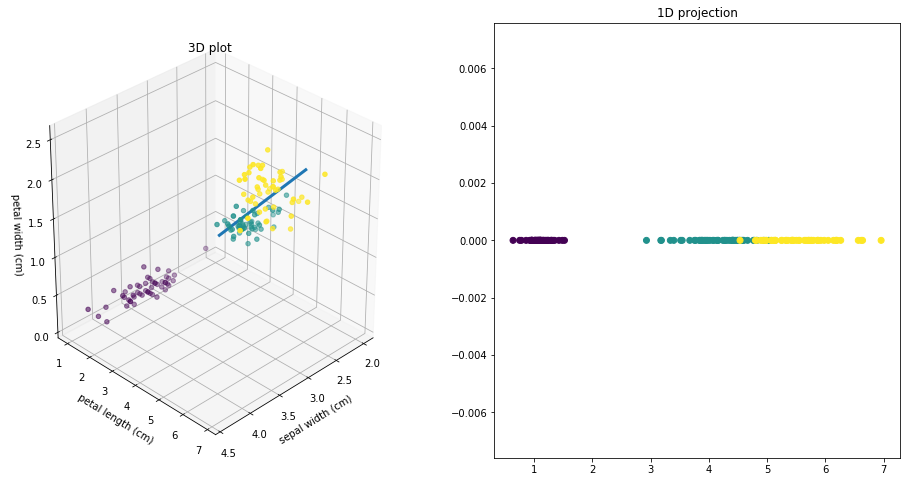

In [95]:
from mpl_toolkits.mplot3d import Axes3D
pca3 = PCA(n_components=1)
pca3.fit(X[:, 1:])
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 1],X[:, 2],X[:, 3],c=y)
comp1 = pca3.mean_+3*pca3.components_[0]
ax.plot(xs=[pca3.mean_[0],comp1[0]],ys=[pca3.mean_[1],comp1[1]],zs=[pca3.mean_[2],comp1[2]],linewidth=3)
plt.xlabel(irisData['feature_names'][1])
plt.ylabel(irisData['feature_names'][2])
ax.set_zlabel(irisData['feature_names'][3])
ax.view_init(30,45)
plt.title('3D plot')
ax = fig.add_subplot(122)
z1 = pca3.components_[0,0]*X[:, 1] +pca3.components_[0,1]*X[:, 2] + pca3.components_[0,2]*X[:, 3]
# plt.scatter(x=pca2.transform(X[:,1:])[:,0],y=pca2.transform(X[:,1:])[:,1],c=y)#z1,z2,c=y)
plt.title('1D projection')
plt.scatter(z1,y=np.zeros(len(z1)),c=y)
plt.savefig('projection3D1D.png',bbox_inches='tight')
plt.show()

In [92]:
pca3.components_[0]

array([-0.09961563,  0.91735823,  0.38539668])

In [170]:
# from sklearn.datasets import make_circles
# X, y = make_circles(n_samples=400, factor=.3,noise=.05)

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500)

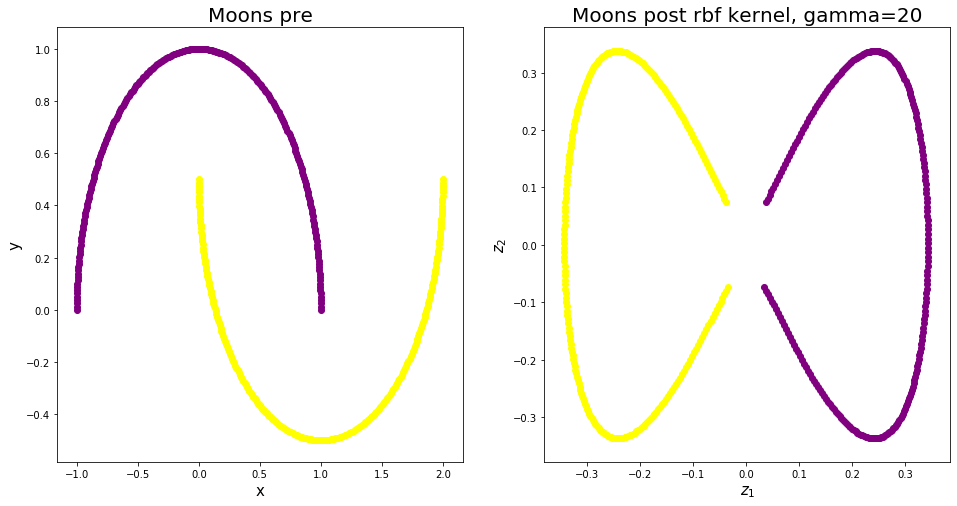

In [175]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True,gamma=20)
X_transf = kpca.fit_transform(X)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
purp = y == 0
yel = y == 1
plt.scatter(X[purp,0],X[purp,1],c='purple')
plt.scatter(X[yel,0],X[yel,1],c='yellow')
plt.title('Moons pre',fontsize=20)
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
ax = fig.add_subplot(122)
plt.scatter(X_transf[purp,0],X_transf[purp,1],c='purple')
plt.scatter(X_transf[yel,0],X_transf[yel,1],c='yellow')
plt.title('Moons post rbf kernel, gamma=20',fontsize=20)
plt.xlabel(r'$z_1$',fontsize=15)
plt.ylabel(r'$z_2$',fontsize=15)
plt.savefig('moonsTransform.png',bbox_inches='tight')
plt.show()

In [177]:
from sklearn.datasets import load_boston

data = load_boston()

In [178]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

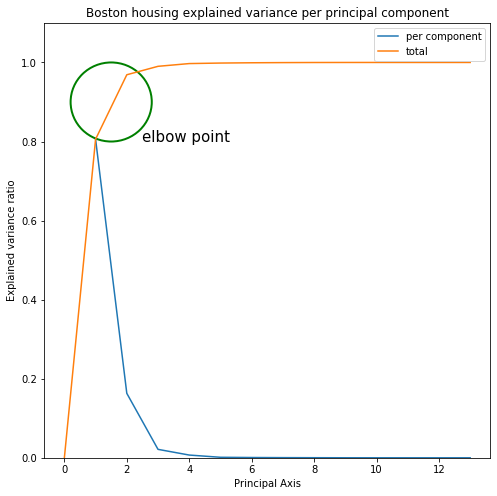

In [208]:
from matplotlib.patches import Ellipse

pca = PCA()
bost_transf = pca.fit_transform(data['data'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.plot(range(1,pca.n_components_+1),pca.explained_variance_ratio_,label='per component')
plt.plot(range(pca.n_components_+1),np.append([0],np.cumsum(pca.explained_variance_ratio_)),label='total')
plt.ylim(0,1.1)
plt.title('Boston housing explained variance per principal component')
plt.legend()
el = Ellipse(xy=(1.5,.9), width=2.6, height=.2, angle=0,fill=None,edgecolor='green',linewidth=2)
ax.add_artist(el)
plt.text(x=2.5,y=0.8,s='elbow point',fontsize=15)
plt.xlabel('Principal Axis')
plt.ylabel('Explained variance ratio')
plt.savefig('explainedVarianceBH.png',bbox_inches='tight')
plt.show()
